(Placeholder for your group #) Group 10

(Placeholder for your names) Ingrid Salvador Maldonado,

(Placeholder for your i-numbers) i6314966,

**Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow)**: *list websites where you found code (or other info) as well as include information on how you used genAI tools*

# Data Analysis, Clinic 3

By completing and delivering the clinic tasks you will know how to :

1. Run Classification Models (Logistic Regression, Decision Trees, Random Forests, etc.) in Python
1. Explain and tackle issues like missing values or class inbalance in your dataset
1. Judge the results of a classification model using AUROC scores
1. Select a proper algorithm that works well with your data using techniques like:
    * Cross Validation
    * Regularization
    
---
### Important Dates

- Clinic release: Tue, 18th Feb
- **Clinic due**: Fri, 28th Feb late night (wildcards possible, apply to the group)
---
##  Some rules

* For this clinic, like the previous one, we are asking you to use specific libraries that are included in the `requirements.txt`. If you use any additional library, this may complicate the grading process, and we reserve the right to penalize your grade for unnecessary complexity of the solution. All the questions can be solved with the libraries in `requirements.txt`.

* Make sure that you include a proper amount/mix of comments, results and code. More specifically, be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.

* Back up any hypotheses and claims with data, since this is an important aspect of the course.

* Please write all your comments in English, and use meaningful variable names (as possible) in your code. 

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook. We will not run your notebook for you! 

- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. If you deliver other files, we will not grade anything.

* Honor code applies to these tasks. If you are not certain about an action, consult with Jerry.

**A Note from Jerry on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating (that does not only apply to LMs). Fortunately, my job is not to police, but rather to educate you. So, please consider the following:

I assume that you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!

I don't restrict the use of LMs because I see the value of being helped when coding (esp. in the context of pandas dataframes nightmare :)). Based on what we saw last year in your notebooks, it's pretty clear when you "copy" some code and then you struggle to interpret the results. This is the essence of this course and of the skills you should try build for yourself: Many people can run fancy models these days but not many people can interpret the results correctly. Try to be the latter ones.


# Context

In this clinic, we will continue navigating the amazing world of modeling and explore classification models under extreme inbalance and missing values scenarios.

The first part of the assignment (Questions 1-9) will help you understand the impact of inbalance and missingness in the classification performance and explore different scenarios on how to improve. Most steps are laid out for you, but you are welcome to deviate.

The second part of the assignment (Question 10) is purposefully left open-ended (as in the previous clinics). In this case, you will be allowed to compare different classifiers of your choice in an effort to deal with the imbalance in the data. You can also implement some of the techniques we discussed in class about imbalances. 

## Score breakdown

Question | Points
--- | ---
[Question 1](#q1) | 3
[Question 2](#q2) | 3
[Question 3](#q3) | 4
[Question 4](#q4) | 4
[Question 5](#q5) | 4
[Question 6](#q6) | 6
[Question 7](#q7) | 4
[Question 8](#q8) | 8
[Question 9](#q9) | 4
[Question 10](#q10)| 15 
Total | 55

This score will be scaled down to 1 and that will be your final clinic score.

In [141]:
#feel free to include additional libraries, as long as they are included in the requirements.txt
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
sns.set(context='paper')

## Part 1: Determine the Inbalance (Asymmetry)

First, we would like to notice in our data that they are highly unbalanced (assymetric). Load the data which should contain 9 columns (`health`, `age`, `sex`, `educ`, `sexornt`, `partyid`, `race`, `married`, `income`). `Age`, `educ` (how many years of education a person has) and `income` are quantitative, the others are qualitative.

In [142]:
gssdata=pd.read_csv("gssdata4.csv")
gssdata.head()

,health,age,sex,educ,sexornt,partyid,race,married,income
0,excellent,53,male,16,heterosexual or straight,rep,white,1,18750.0
1,excellent,26,female,16,heterosexual or straight,rep,white,1,18750.0
2,good,59,male,13,heterosexual or straight,rep,white,1,NaN
3,excellent,74,female,17,heterosexual or straight,other,white,1,NaN
4,poor,37,female,10,heterosexual or straight,other,white,0,NaN


Our goal is to predict if a person is in poor health or not. Let's create some dummy variables in order to measure that.


In [143]:
poorhealth = np.where(gssdata['health'] == 'poor',1,0)
notpoorhealth = np.where(gssdata['health'] != 'poor',1,0)
gssdata['poorhealth'] = poorhealth
gssdata['notpoorhealth'] = notpoorhealth


In [144]:
gssdata.describe()

,age,educ,married,income,poorhealth,notpoorhealth
count,1551.000000,1551.000000,1551.000000,963.000000,1551.000000,1551.000000
mean,48.172792,13.803353,0.732431,15633.177570,0.063830,0.936170
std,17.051151,3.011700,0.442835,5064.191118,0.244528,0.244528
min,18.000000,0.000000,0.000000,500.000000,0.000000,0.000000
25%,33.500000,12.000000,0.000000,13750.000000,0.000000,1.000000
50%,48.000000,14.000000,1.000000,18750.000000,0.000000,1.000000
75%,61.000000,16.000000,1.000000,18750.000000,0.000000,1.000000
max,89.000000,20.000000,1.000000,18750.000000,1.000000,1.000000


### Question 1 <a name="q1"></a>

a) Can you quantify what is the degree of inbalance? Mention a percentage of the split between the positive and the negative class.<br>
b) What is the majority and the minority class?<br>
c) What would be the accuracy of a classifier that predicts everybody NOT being in poor health?<br>
d) Discuss (with each other and the teachers) why accuracy is not a good metric.<br>

**Your answer goes here**

A)
Percentage of good Health: 93.61702 %
Percentage of poor Health: 6.38298 %
Split between good and poor Health: 93.62 % : 6.38 %
B)
The majority class is good Health with percentage: 93.62 %
The minority class is poor Health with percentage: 6.38 %
C)
The classifier accuracy would be: 93.62 %
D)
Discussion summarized in the code comments


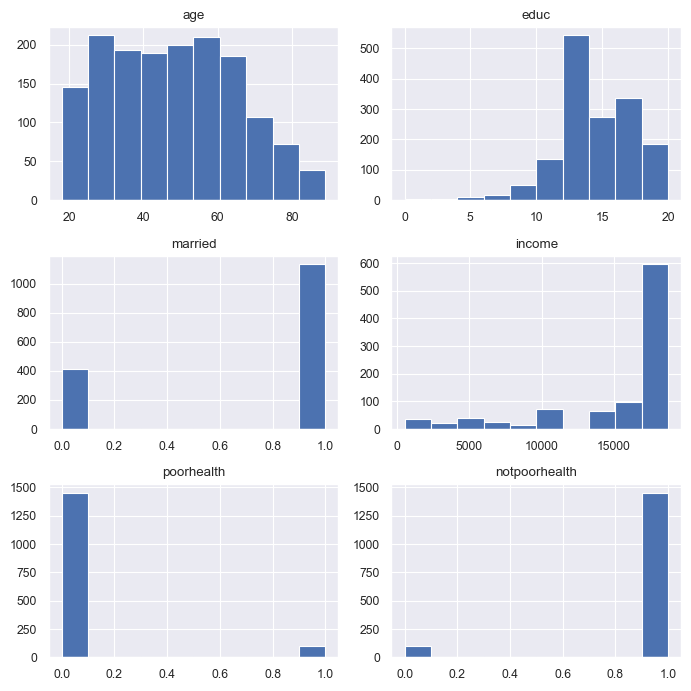

In [145]:
####HERE YOU CAN ADD CODE AND MORE COMMENTS

# Calculate the total number of observations
total_observations = len(gssdata)

print("A)")
#A) to calculate the degree of imbalance first we do the percentage of good health, then the percentage of poor health and finally print the percentage of the split
#If the data, as said, is highly imbalanced the difference in percentages will be large

#Percentage of positive (good health) is (number of good health/total observations)*100
good_health = sum(gssdata['notpoorhealth'])

percentage_good_health = (good_health / total_observations) * 100

print(f"Percentage of good Health: {percentage_good_health:.5f} %")

#Percentage of negative (poor health) is (number of poor health/total observations)*100
poor_health = sum(gssdata['poorhealth'])

percentage_poor_health = (poor_health / total_observations) * 100

print(f"Percentage of poor Health: {percentage_poor_health:.5f} %")

# Calculate the split
print(f"Split between good and poor Health: {percentage_good_health:.2f} % : {percentage_poor_health:.2f} %")

print("B)")
#B)The majority class is the one with highest percentage  and the minority class is the one with lowest percentage

print(f"The majority class is good Health with percentage: {percentage_good_health:.2f} %") 

print(f"The minority class is poor Health with percentage: {percentage_poor_health:.2f} %") 

print("C)")

#C)A baseline classifier that predicts everyone NOT being in poor health would have accuracy (Number of not in poor health/total)*100
#Since NOT being in poor health is majority it would be very accurate, which shows how imbalance data lead to biases on the classification

print(f"The classifier accuracy would be: {percentage_good_health:.2f} %") 


print("D)")
#D) We discussed that accuracy in this case is not a good metric because of the imbalanced data it has a misleading performance that underepresents the minority class.
#It would be better to switch to other metrics like F1-Score (balance precission and recall) or ROC-AUC Score (measures how distinguish between classes)

print("Discussion summarized in the code comments")

gssdata.hist(figsize=(7,7))
plt.tight_layout()

## Part 2: Fit a logistic model ignoring missing values

Let's begin by fitting a logistic regression model to predict poor health based on several of the other predictors in the model. In part 3, you will be asked to regularize (with cross-validation) to make sure you do not overfit, but for this part, we will keep things simple.

First, we need to do a small amount of data clean-up (ignoring missingness for now in `income`). Best practice would be to split into train/test first before looking at the data, but again, we can keep it simple in this part.

If you ignore the missingness `sklearn` might crash (`ValueError: Input contains NaN, infinity or a value too large for dtype('float64')`.) So you can also consider not using that variable in the model

In [146]:
#creating dummies two ways
gssdata['female'] = 1*(gssdata['sex'] ==  'female')
dummy_vars = pd.get_dummies(gssdata[['sexornt','partyid','race']])
gssdata = gssdata.join(dummy_vars)

In [147]:
#Let's get a sense of the data we have
print(gssdata.shape)
gssdata.head()

(1551, 22)


,health,age,sex,educ,sexornt,partyid,race,married,income,poorhealth,...,sexornt_bisexual,sexornt_dont know,sexornt_heterosexual or straight,sexornt_homosexual or gay,partyid_dem,partyid_other,partyid_rep,race_black,race_other,race_white
0,excellent,53,male,16,heterosexual or straight,rep,white,1,18750.0,0,...,False,False,True,False,False,False,True,False,False,True
1,excellent,26,female,16,heterosexual or straight,rep,white,1,18750.0,0,...,False,False,True,False,False,False,True,False,False,True
2,good,59,male,13,heterosexual or straight,rep,white,1,NaN,0,...,False,False,True,False,False,False,True,False,False,True
3,excellent,74,female,17,heterosexual or straight,other,white,1,NaN,0,...,False,False,True,False,False,True,False,False,False,True
4,poor,37,female,10,heterosexual or straight,other,white,0,NaN,1,...,False,False,True,False,False,True,False,False,False,True


### Question 2 <a name="q2"></a>

In the code below try to fit your logistic regression model and provide some short comments on the performance of the model. You don't need to be detailed (yet), but make sure to make 1-2 observations at least.

In [148]:
######HERE YOUR CODE TO FIT THE MODEL
######
######
######Look up LogisticRegression() from scikitlearn

#Since SKlearn is an allowed library we will also use the train_test_split method they provide
from sklearn.model_selection import train_test_split
#And also some of the metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#To avoid the NaN variables I drop the income column
gssdata_clean = gssdata.dropna(subset=['income'])

#Now we encode the dummies
gssdata_encoded = pd.get_dummies(gssdata_clean, drop_first=True) 

# 1. Splitting the data into features (X) and target (y)
X = gssdata_encoded.drop(columns=['poorhealth'])  # Dropping the target 
y = gssdata_encoded['poorhealth']

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)  
logreg.fit(X_train, y_train)

# 4. Predictions
y_pred = logreg.predict(X_test)

# 5. Model Evaluation
#We still use the accuracy to prove our poin in question 1
accuracy = accuracy_score(y_test, y_pred)
#We print the TP,TN,FP,FN
conf_matrix = confusion_matrix(y_test, y_pred)
#We print the recall, precision and F1 Score
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.990
Confusion Matrix:
[[282   0]
 [  3   4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       282
           1       1.00      0.57      0.73         7

    accuracy                           0.99       289
   macro avg       0.99      0.79      0.86       289
weighted avg       0.99      0.99      0.99       289



**Your answer goes here**

So far We can observe that the accuracy of the logistic regression is very high but as we talked before since the data is imbalanced this is not a good metric.

The matrix shows:
- 282 TN: Correctly predicted as not poor health.
- 0 FP: No cases were incorrectly predicted as poor health when they were actually not.
- 3 FN: Three cases of poor health were incorrectly predicted as not poor health.
- 4 TP: Four cases of poor health were correctly predicted.
The model does well in predicting good health (no false positives), but it misses some cases of poor health (false negatives), which is normal in imbalanced datasets.

The precission and recall of the negative class is also quite high, while the positive class has a lower recall and F1 Score

Precision for class 0 : 0.99 – When the model predicts good health, it is correct 99% of the time.
Recall for class 0 : 1.00 – The model correctly identifies all individuals in good health.
Precision for class 1 : 1.00 – When the model predicts poor health, it is correct 100% of the time.
Recall for class 1 : 0.57 – The model only correctly identifies 57% of individuals in poor health, missing some cases.
F1-Score for class 1 +: 0.73 – This is a balance of precision and recall for poor health, indicating moderate performance, but still leaving room for improvement.

Observations:
1 > The model is very accurate, but as expected, the high accuracy is misleading because of the class imbalance.
2 > Precision for poor health is high (100%), but recall is low (57%), meaning the model is good at predicting poor health when it does, but it misses many poor health cases.


---

## 2a: Handling missingness approach \#1: remove observations. 

We do not know how sklearn will treat the missing values (the `NaN`s), so we should do handle them ourselves.  As a base case, let's remove all observations with missingness.

### Question 3 <a name="q3"></a>

In the code below, remove all observations that are not complete. Report on how many samples were dropped. Do a quick check to see how dropping observations affected the amount of poor health individuals. Do an appropriate plot to show this.

Number of samples dropped: 588
Before dropping: 99 poor health individuals
After dropping: 16 poor health individuals


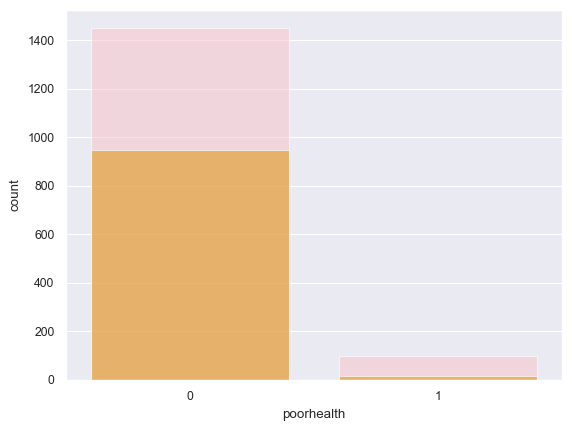

In [149]:
##In the code below: Remove all observations that are not complete
##Report on how many samples were dropped.

#Do a quick check to see how dropping observations affected the amount of poor health individuals
#Do an appropriate plot to show this (e.g. boxplot)

#I assume the final data frame is the one encoded and cleaned from question 2

gssdata_full = gssdata_encoded #<---this should be your final data frame.

# how many samples were dropped
dropped_samples = len(gssdata) - len(gssdata_full)
print(f"Number of samples dropped: {dropped_samples}")

#  how dropping observations affected the amount of poor health individuals
before_dropping = gssdata['poorhealth'].sum()
after_dropping = gssdata_full['poorhealth'].sum()

print(f"Before dropping: {before_dropping} poor health individuals")
print(f"After dropping: {after_dropping} poor health individuals")

# Plot before and after dropping
sns.countplot(x='poorhealth', data=gssdata, color='pink', label='Before Dropping', alpha=0.6)
sns.countplot(x='poorhealth', data=gssdata_full, color='orange', label='After Dropping', alpha=0.6)

# Show the plot
plt.show()

In [150]:
#Now we will split the data before fitting any models, feel free to change this/adapt this to your taste

from sklearn.model_selection import train_test_split
itrain, itest = train_test_split(range(gssdata_full.shape[0]), test_size=0.25)

#gsstemp = gssdata_full.drop(['health','fairhealth','goodhealth','excellenthealth','sex','sexornt','partyid','race'],axis=1)
gsstemp = gssdata_full[['age','educ','female','partyid_dem','partyid_rep','income']]

X_train = gsstemp.iloc[itrain, :]
X_test = gsstemp.iloc[itest, :]
y_train = gssdata_full['poorhealth'].iloc[itrain]
y_test = gssdata_full['poorhealth'].iloc[itest]

y_train.shape, X_train.shape, y_test.shape, X_test.shape

# Check the shapes to confirm the split
print(f"Training feature set shape: {X_train.shape}")
print(f"Test feature set shape: {X_test.shape}")
print(f"Training target set shape: {y_train.shape}")
print(f"Test target set shape: {y_test.shape}")

Training feature set shape: (722, 7)
Test feature set shape: (241, 7)
Training target set shape: (722,)
Test target set shape: (241,)


**Your answer goes here**

Dropping the columns with the missing income values affected the amounth of poor health people and also the amount of non-poor-health individuals. This went from 99 poor health people to only 16. 

### Question 4 <a name="q4"></a>

Fit a logistic regression mode with `C=1000000` (that means that we don't any regularization) and evaluate the classification accuracy on the test set. Discuss whether this accuracy is good/bad.

Then move below to be reminded on the confusion matrix.

In [151]:
from sklearn.metrics import accuracy_score

#####################
# Your code here: fit a logistic model with C=1000000 and evaluate classification accuracy on the test set.
# Then move below to be reminded on the confusion matrix
#####################

logit1 = LogisticRegression(C = 1000000)
logit1.fit(X_train, y_train)

y_pred = logit1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Classification accuracy: {accuracy}")
#logit1
#<-- this should be the name of your model so as to work below with the confusion matrix 
      #(or if you have a different name, then change it there as well)

Classification accuracy: 0.983402489626556


**Your answer goes here**

The classification accuracy for the model is 97% which is quite good and represents that in most cases its classification is correctly. However, if we look at the confusion matrix of this model, we see that it correctly identifies negatives (234) but it fails to identify positives (0).

The model probably has a tendency to classifiy everything as negative which is really bad since we would be no taking into account possitive cases.

## Reminder: The Confusion Matrix & Some Useful Functions

- the samples that are +ive and the classifier predicts as +ive are called True Positives (TP)
- the samples that are -ive and the classifier predicts (wrongly) as +ive are called False Positives (FP)
- the samples that are -ive and the classifier predicts as -ive are called True Negatives (TN)
- the samples that are +ive and the classifier predicts as -ive are called False Negatives (FN)

A classifier produces a confusion matrix which looks like this:

![confusionmatrix](./confusionmatrix_360.png)


IMPORTANT NOTE: In `sklearn`, to obtain the confusion matrix in the form above, always have the observed `y` first, i.e.: use as `confusion_matrix(y_true, y_pred)`



In [152]:
#the name of your model should be logit1 (to work with the code below)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,logit1.predict(X_test)))

[[237   0]
 [  4   0]]


The following function can be used to create confusion tables with different thresholds (same as we did in the notebook explaing AUROC)

In [153]:
###manually making confusion table from a different threshold
def t_repredict(est, t, xtest):
    probs = est.predict_proba(xtest)
    p0 = probs[:,0]
    p1 = probs[:,1]
    ypred = (p1 > t)*1
    return ypred

In [154]:
#Try it here!

print(confusion_matrix(y_test,t_repredict(logit1, 0.06, X_test)))
print(confusion_matrix(y_train,t_repredict(logit1, 0.06, X_train)))

[[221  16]
 [  4   0]]
[[672  38]
 [  9   3]]


The following fuction should create ROC curves for your models, based on the model and the ground truth. Feel free to change it and improve it!

In [155]:
#making ROC curves for this model
from sklearn.metrics import roc_curve, auc

#name: name of your model to appear on the figure (can be arbitrary)
#clf: the model as you named it - will be used for getting the predictions
#ytest, xtest: your test data
#skip, labe: steps that control how many points you see in the ROC curve and how many labels are there

def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM? (but double-check this pleaseee)
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    
    #this is the single value for the AUC score
    roc_auc = auc(fpr, tpr)
    
    if skip: 
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    
    #add labels to the curve
    if labe!=None:
        for k in range(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

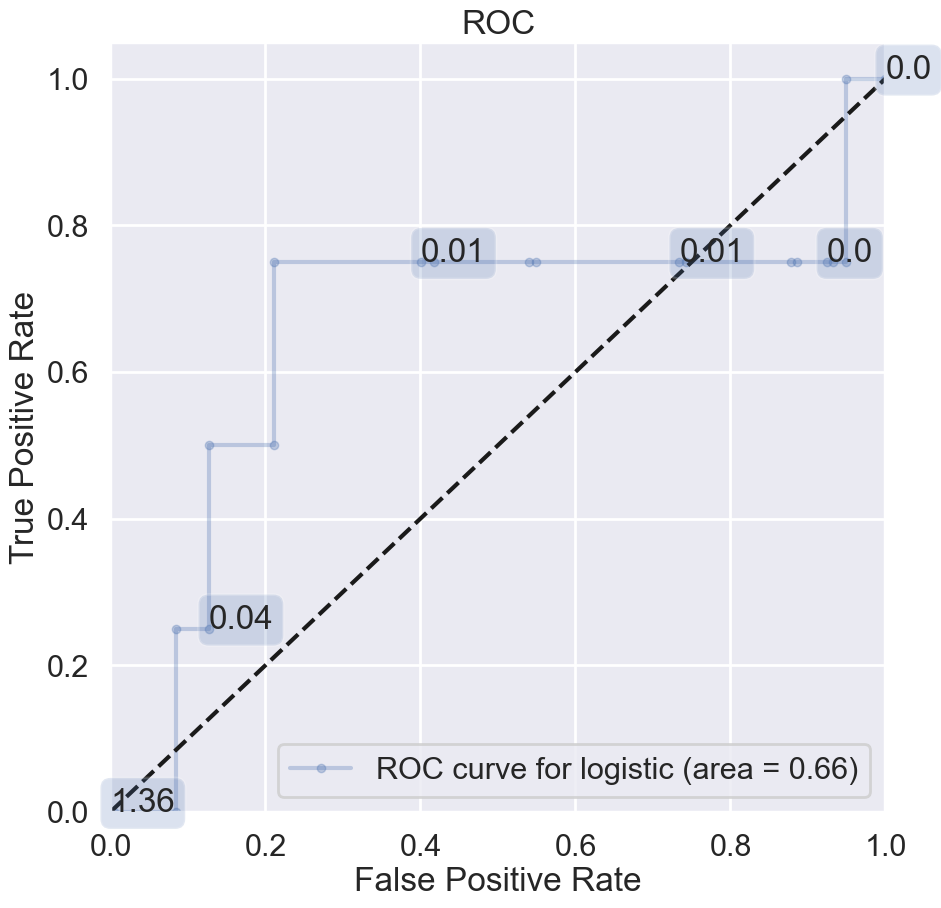

In [156]:
#This is how the above function should be used

sns.set_context("poster")
fig, ax = plt.subplots(figsize = (10,10))
ax=make_roc("logistic",logit1, y_test, X_test, labe=4, skip=0)
plt.show()

### Question 5 <a name="q5"></a>


What does the above ROC curve tell you about the quality of the model we fit on the data?

**Your answer goes here**

Looking at the curve the better threshold is the one near 0.01 as we get almost 80% true positive rate and 20% false positive rate, meaning that having a lenient threshold will result in the model classifiying most samples as positives correctly.However, if we look at the whole picture, we can observe that the model could improve since it has a moderate performance then even thought it distinguishes between the two classes quite good it still does some misclassifcation.

## Let's get back the data with missingness

It's time to build a model to impute the missing data!

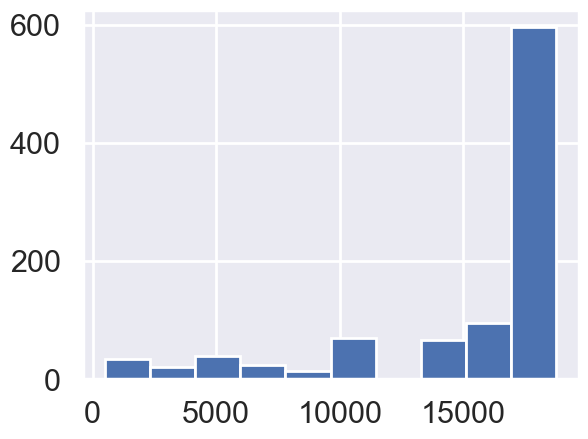

In [157]:
#first build a model to impute using data without missing 
hist = plt.hist(gssdata_full['income'])

---

## 2b: Handling missingness approach \#2: impute the mean 

### Question 6 <a name="q6"></a>

In your first approach, make a copy of the original data frame and impute the missing values by assuming that every missing value shoudl be replaced by the mean. Make sure to do a histogram as well and compare it with the original!

Then fit a model (as before in 2a.) and judge the model accuracy. Use the functions for the ROC curve to establish the result.

Mean income:  15633.177570093458


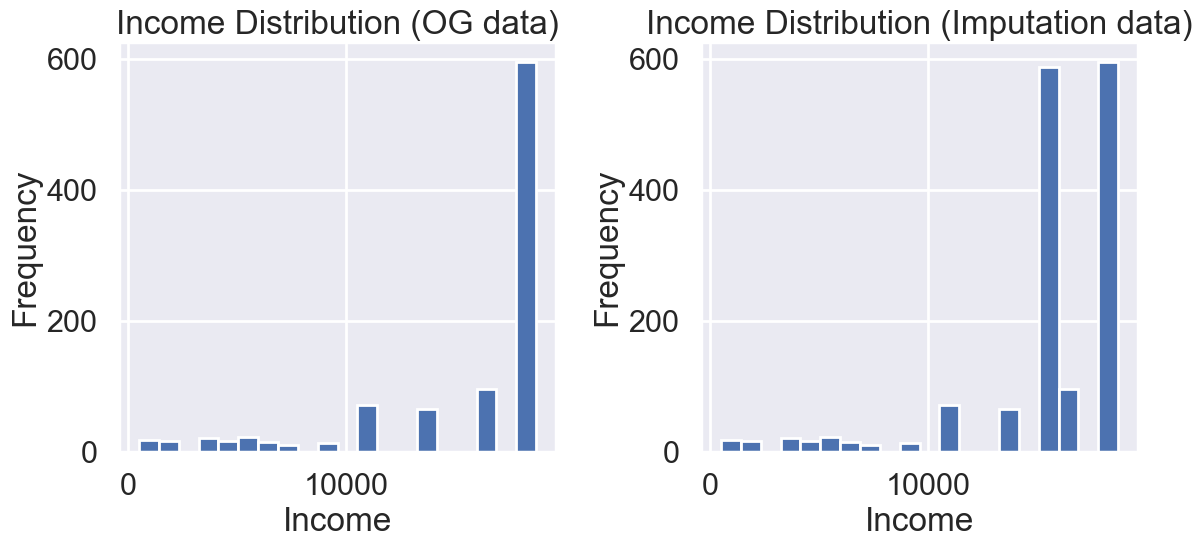

In [158]:
#back to the original data set with missingness, make a copy, and then impute the mean, plot it!
###YOUR CODE HERE
###
###
gssdata_imputed = gssdata.copy()

# Look for the columns which have missing values
#print("Missing values:\n", gssdata_imputed.isnull().sum())

mean = gssdata_imputed['income'].mean()
print("Mean income: " , mean)
gssdata_imputed['income'].fillna(mean, inplace = True)

plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
plt.hist(gssdata['income'].dropna(), bins=20)
plt.title('Income Distribution (OG data)')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(gssdata_imputed['income'], bins=20)
plt.title('Income Distribution (Imputation data)')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [159]:
###here, do a proper train/test split and a model training

#Now we encode the dummies
gssdata_encoded = pd.get_dummies(gssdata_imputed, drop_first=True) 

X = gssdata_encoded.drop(columns=['poorhealth'])  # Dropping the target 
y = gssdata_encoded['poorhealth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
logImputed = LogisticRegression()  
logImputed.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


In [164]:
#####################
#your code here: create confusion tables for some thresholds to have an idea of how data looks like
#####################

accuracy = accuracy_score(y_test, y_pred)
#We print the TP,TN,FP,FN
conf_matrix = confusion_matrix(y_test, y_pred)
#We print the recall, precision and F1 Score
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print("Confusion Matrix with default threshold:")
print(conf_matrix)
print("Confussion Matrix with 0.06 threshold:")
print(confusion_matrix(y_test,t_repredict(logImputed, 0.06, X_test)))
print("Confussion Matrix with 0.07 threshold:")
print(confusion_matrix(y_test,t_repredict(logImputed, 0.07, X_test)))
print("Confussion Matrix with 0.08 threshold:")
print(confusion_matrix(y_test,t_repredict(logImputed, 0.08, X_test)))
#print(confusion_matrix(y_train,t_repredict(logImputed, 0.06, X_train)))




#print("Classification Report:")
#print(class_report)

Accuracy: 0.979
Confusion Matrix with default threshold:
[[363   0]
 [  8  17]]
Confussion Matrix with 0.06 threshold:
[[363   0]
 [  0  25]]
Confussion Matrix with 0.07 threshold:
[[363   0]
 [  0  25]]
Confussion Matrix with 0.08 threshold:
[[363   0]
 [  0  25]]


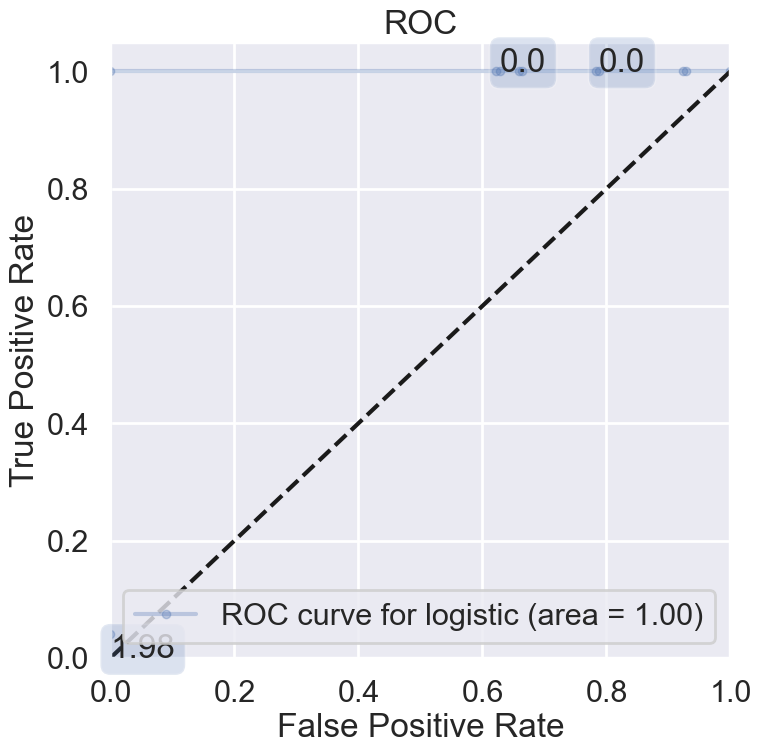

In [166]:
#####################
# your code here: create an ROC curve
#####################

sns.set_context("poster")
fig, ax = plt.subplots(figsize = (8,8))
ax=make_roc("logistic",logImputed, y_test, X_test, labe=4, skip=0)
plt.show()

### Question 7 <a name="q7"></a>


What does the above ROC curve tell you about the quality of the model we fit on the data?

**your answer goes here**

---

## 2c: Handling missingness approach \#3: impute with a model (linear regression here)

The third and most sophisticated approach would be to fit a linear model (multiple regression) to estimate income based on the other features (`age`, `educ`, `sex`, `partyid`).

### Question 8 <a name="q8"></a>

Train this model below and then use it in order to compute the missing values. The steps should be as follows:

+ figure out which observations have missing values for income,
+ create the values you will use for imputation by:<br>
a) calculating the predicted values for the observations with missingness using the linear model<br>
b) use these values to impute back into the income variable in the missing entries<br>
+ Do a histogram to see how does that look like

In [162]:
#use the dataset without NAs here
#train a model

#####################
# your code here: 

#####################

Then fill the missing data with the results you got. You can do that multiple ways, one way to use Python would be the following:

In [163]:
#you might need to change some of the variables below, but in principle it should work
missing_index = gssdata.income[gssdata.income.isnull()].index
missing_series = pd.Series(data = income, index = missing_index)
#back to the data set with missingness and impute the predictions
gssdata_imp = gssdata.copy()
gssdata_imp['income'] = gssdata_imp['income'].fillna(missing_series)

NameError: name 'income' is not defined

In [ ]:
gssdata_imp['income'].hist(figsize=(7,5))
gssdata_imp['income'].describe()

In [ ]:
#HERE FIT YOUR MODEL AS USUAL FOR PREDICTING THE HEALTH STATUS (POOR OR NOT)
###here, do a proper train/test split and a model training

#Now we will split the data before fitting any models, feel free to change this/adapt this to your taste

In [ ]:
#here you fit a model
#should be called logit3

In [ ]:
#MAKE CONFUSION TABLES FOR DIFFERENT THRESHOLDS AND DRAW THE AUROC CURVE
#####################
# your code here: create an ROC curve
#####################

sns.set_context("poster")
fig, ax = plt.subplots(figsize = (10,10))
#here add code
plt.show()

### Question 9 <a name="q9"></a>


Now comment on the performance of difference imputation methods and on the impact it has on the final model performance.


**Your answer goes here**

## Part 3: Improving the model.

### Question 10 <a name="q10"></a>


Apply regularization (with cross-validation) to make sure not to overfit to the data and try also different models, like a Decision Tree or a Random Forest. Report on your results for which model handles inbalances in the best way.

For this question, you are also free (but not onbliged) to use techniques to address class imbalances (as we discussed in class) both on the data or model level. Recall that each method has advantages and disadvantages, so you will need to correctly interpret the results and assess the performance of any method you choose on the problem we explore here. Some examples can be found [here](https://imbalanced-learn.org/stable/index.html). 

In [ ]:
## your code goes here